<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/11_Healthcare_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

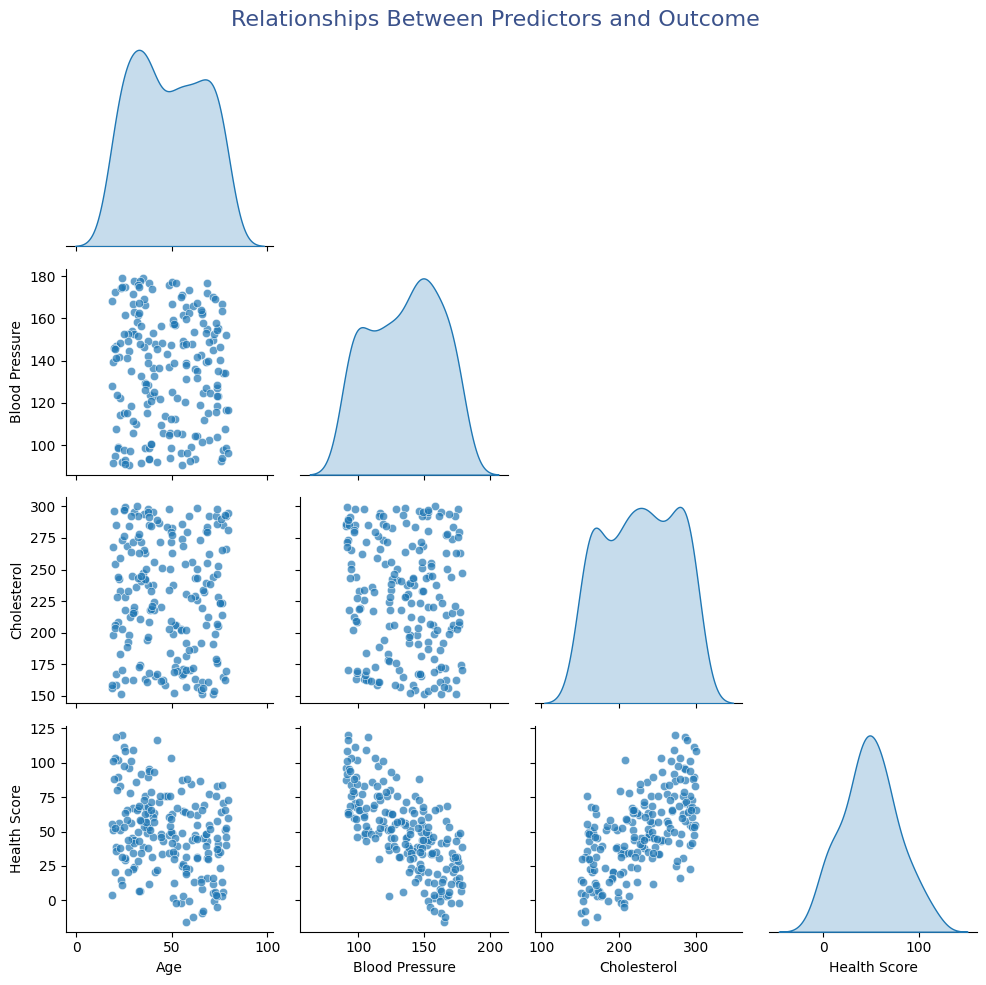

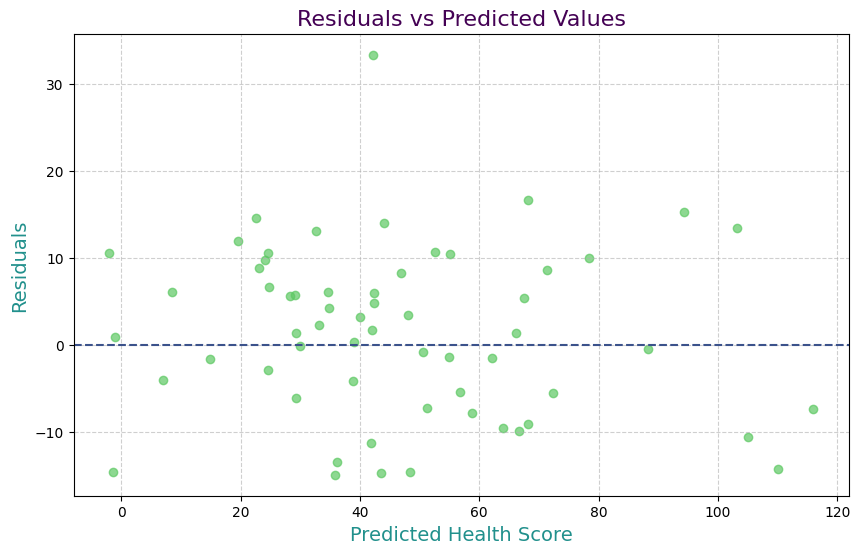

                            OLS Regression Results                            
Dep. Variable:           Health Score   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     336.5
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.02e-62
Time:                        21:36:00   Log-Likelihood:                -524.46
No. Observations:                 140   AIC:                             1057.
Df Residuals:                     136   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             96.8108      7.281     13.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS, add_constant

# I want to simulate a dataset to study multiple linear regression in a healthcare context.
# My goal is to predict a patient's health score based on three predictors: age, blood pressure, and cholesterol.

np.random.seed(42)  # I set a seed for reproducibility.

# Generating synthetic data for predictors and outcomes
n_samples = 200
age = np.random.uniform(18, 80, n_samples)  # Predictor 1: age
blood_pressure = np.random.uniform(90, 180, n_samples)  # Predictor 2: blood pressure
cholesterol = np.random.uniform(150, 300, n_samples)  # Predictor 3: cholesterol
error = np.random.normal(0, 10, n_samples)  # Adding some noise

# Outcome variable: health score
health_score = 100 - 0.5 * age - 0.7 * blood_pressure + 0.3 * cholesterol + error

# I organize the data into a pandas DataFrame for easier manipulation.
df = pd.DataFrame({
    'Age': age,
    'Blood Pressure': blood_pressure,
    'Cholesterol': cholesterol,
    'Health Score': health_score
})

# Splitting the data into training and test sets to evaluate the model.
X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Health Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting a multiple linear regression model using sklearn.
model = LinearRegression()
model.fit(X_train, y_train)

# Extracting the coefficients and intercept to understand the fitted model.
intercept = model.intercept_
coefficients = model.coef_

# Predicting health scores for both training and test sets.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating performance metrics for the model.
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# I want to visualize the relationships between predictors and the outcome.
# This will help me understand the data better and identify any potential correlations.
sns.pairplot(df, diag_kind="kde", corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Relationships Between Predictors and Outcome", fontsize=16, color="#3B528BFF")
plt.tight_layout()
plt.show()

# Visualizing residuals to check the model's assumptions.
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, color="#5DC863FF", alpha=0.7)
plt.axhline(0, color="#3B528BFF", linestyle="--")
plt.title("Residuals vs Predicted Values", fontsize=16, color="#440154FF")
plt.xlabel("Predicted Health Score", fontsize=14, color="#21908CFF")
plt.ylabel("Residuals", fontsize=14, color="#21908CFF")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Using statsmodels to provide detailed statistical output for interpreting the model.
X_with_const = add_constant(X_train)  # Adding a constant term for the intercept
ols_model = OLS(y_train, X_with_const).fit()

# Printing the summary of the regression model to analyze coefficients, p-values, and R-squared.
print(ols_model.summary())

# Summarizing my findings to help myself reflect on what I’ve learned from this exercise.
print(f"Intercept: {intercept:.2f}")
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"  {feature}: {coef:.2f}")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Training R-squared: {train_r2:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Reflections:
# The R-squared value suggests how well the model explains the variance in the health score.
# The p-values from the statsmodels output help me understand which predictors are statistically significant.
# Visualizing residuals confirmed that the model's assumptions are mostly satisfied, but further checks may be needed.
# I need to be cautious about over-interpreting coefficients, especially if predictors are correlated.





























